In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
import warnings
import seaborn as sns
from tensorflow.keras.metrics import Metric

warnings.filterwarnings('ignore')

print(tf.__version__)
print(np.__version__)
print(pd.__version__)

2.16.1
1.26.4
2.1.4


In [38]:
data = pd.read_csv('Diabetes Classification.csv').sample(frac=1) #sample is used to gererate the random data otherwise first 5 datas is considered
data.head()
data.describe()
#data.isna().sum() #the no of missing data in each column


,Unnamed: 0,Age,BMI,Chol,TG,HDL,LDL,Cr,BUN,Diagnosis
count,5132.000000,5132.000000,5132.000000,5132.000000,5132.000000,5132.000000,5132.000000,5132.000000,5132.000000,5132.000000
mean,2565.500000,48.950312,24.613406,4.866882,1.719328,1.593305,2.914121,71.144800,4.896969,0.388348
std,1481.625121,14.048794,4.277205,1.001052,1.327057,1.038849,0.945423,28.494394,1.689206,0.487422
min,0.000000,20.000000,15.000000,0.000000,0.000000,0.000000,0.300000,4.860753,0.500000,0.000000
25%,1282.750000,36.000000,22.000000,4.190000,0.910000,1.090000,2.290000,58.000000,3.900000,0.000000
50%,2565.500000,49.000000,24.000000,4.800000,1.380000,1.300000,2.790000,70.200000,4.720000,0.000000
75%,3848.250000,59.000000,27.000000,5.460000,2.100000,1.590000,3.400000,81.600000,5.600000,1.000000
max,5131.000000,93.000000,47.000000,11.650000,32.640000,9.900000,9.900000,800.000000,38.900000,1.000000


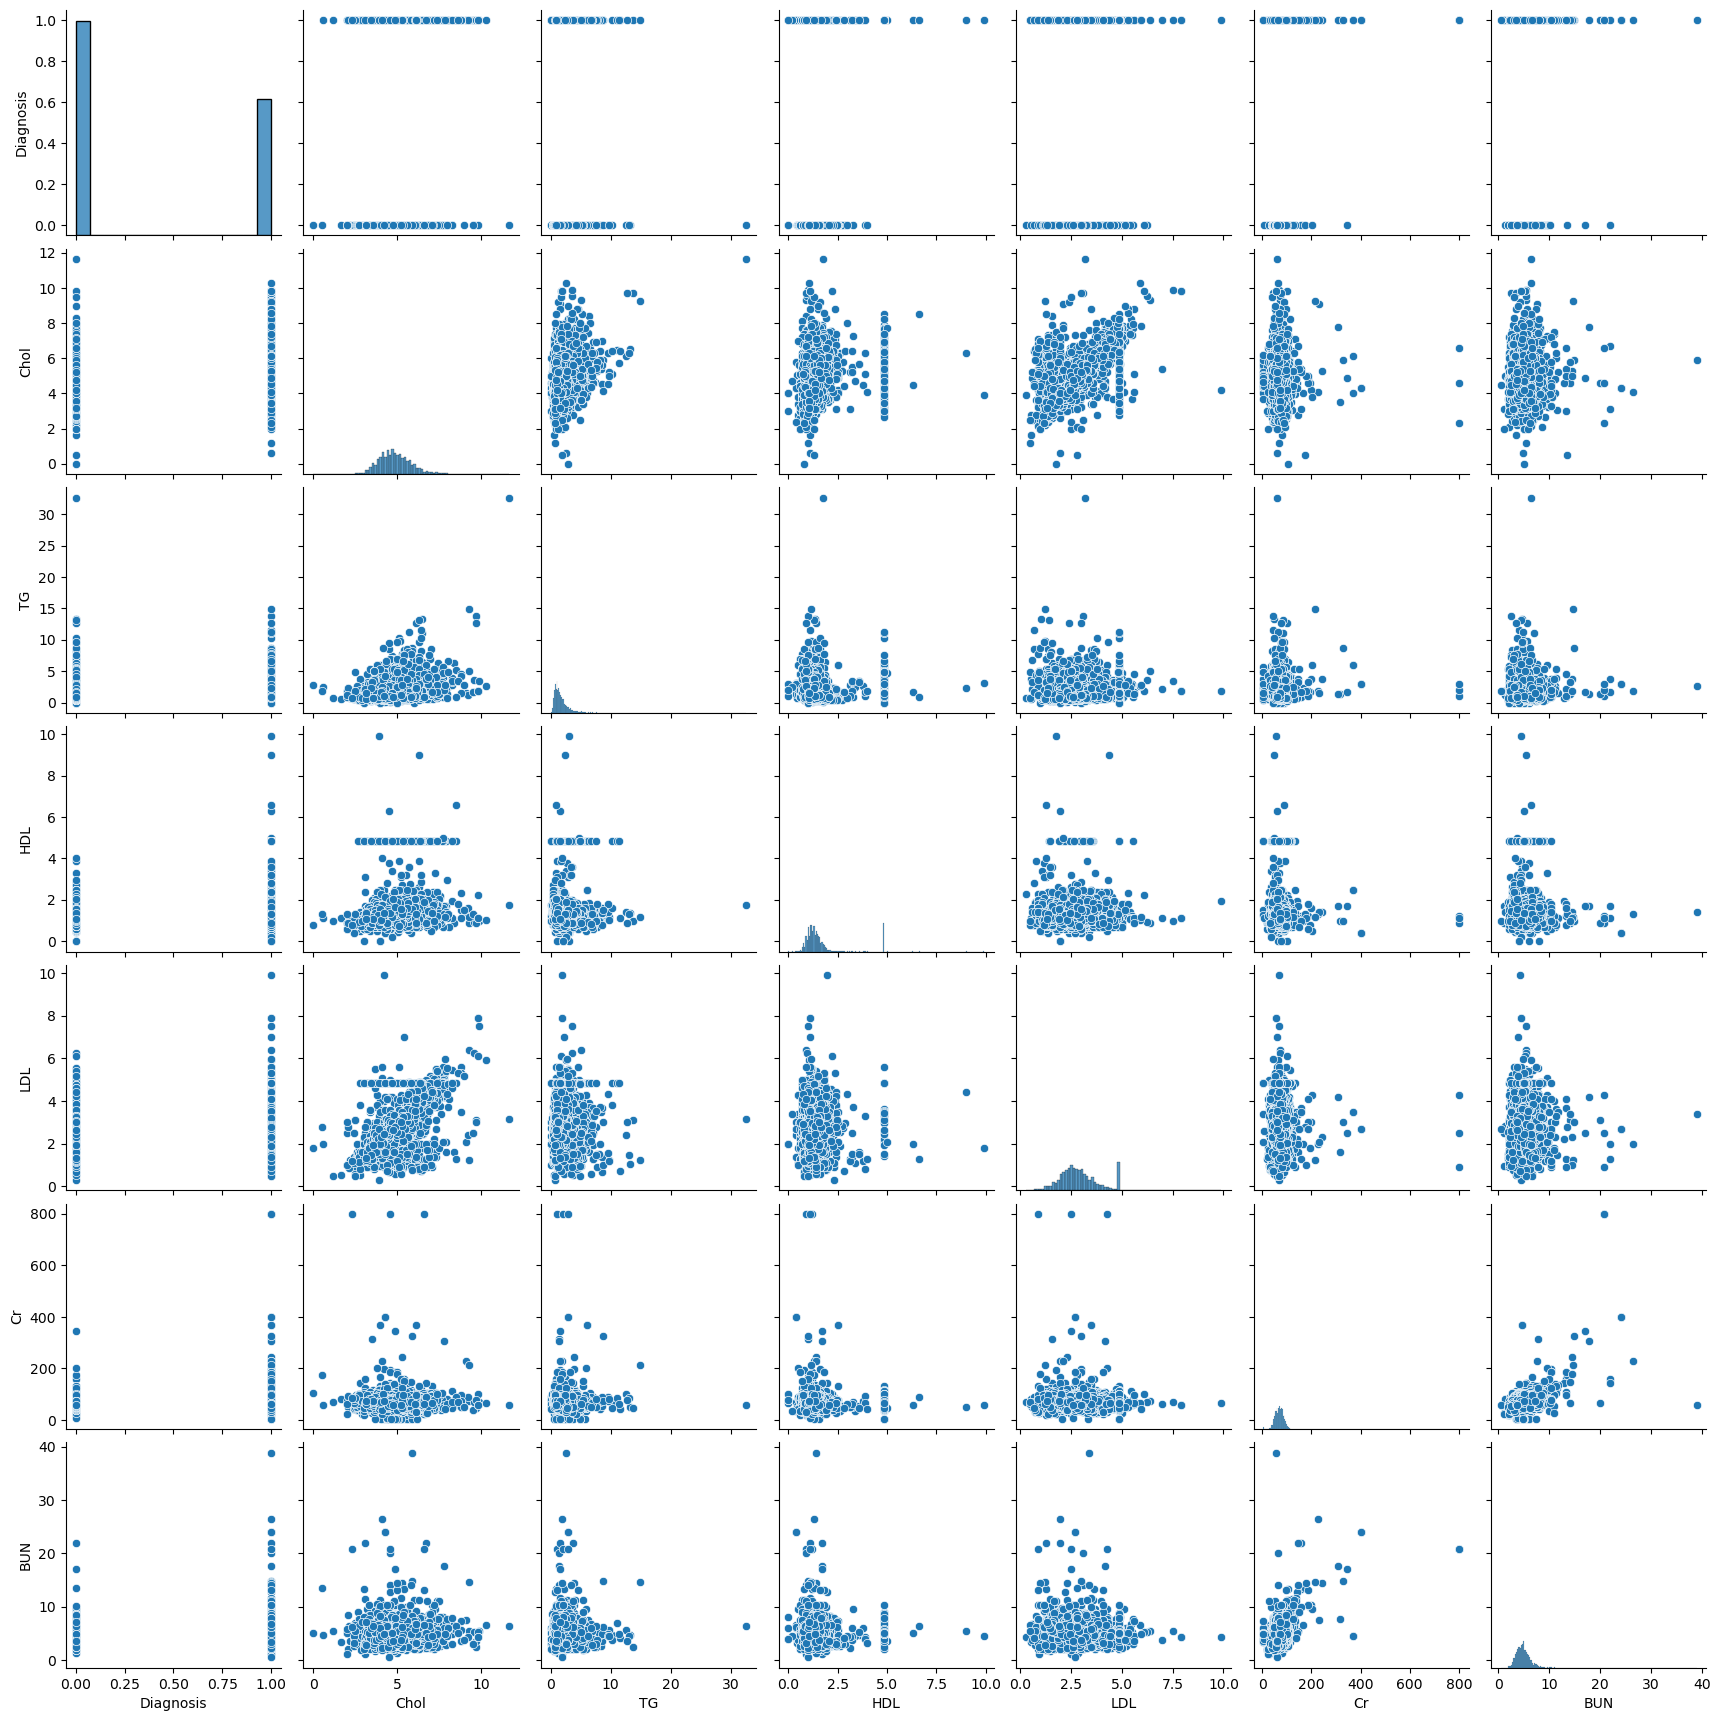

In [25]:
sns.pairplot(features)

<Axes: >

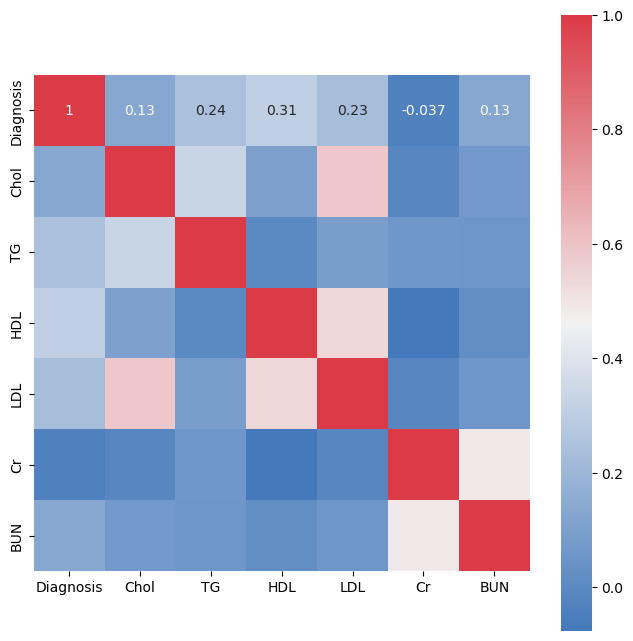

In [26]:
corr = features.corr()
cmap = sns.diverging_palette(250 , 10 , as_cmap=True)
plt.figure(figsize=(8,8))
sns.heatmap(corr, square=True, cmap=cmap, annot=True)

In [28]:
#data_preprocessing
features = data[['Diagnosis','Chol','TG','HDL','LDL', 'Cr','BUN']]

# features['Age']=features['Age'].fillna(42)
# age2=pd.get_dummies(features['age'])
# features=features.drop(columns=['Age','BUN']
# features=pd.concat(['features','age2'],axis=1)

#to train the data use the command
target=data['BMI']

train_size=int(0.8*len(data))
X_train, X_test = features.values[ :train_size, :],features.values[train_size: , :]
y_train, y_test = target.values[:train_size],target.values[train_size:]

print(len(X_train))


4105


In [29]:
class LinearModel:
    def __init__(self):
        # y_pred= W x + b (y=Mx+c)
        self.initializer = tf.keras.initializers.GlorotUniform()
        
        #self.W= tf.Variable(13.0)
        #self.b = tf.Variable(4.0)
    
    def loss(self, y, y_pred): 
        return tf.reduce_mean(tf.abs(y - y_pred))
        
    def train(self, X, y, lr=0.00001,epochs=20, verbose=True):
        X = np.asarray(X, dtype=np.float32)       
        y = np.asarray(y, dtype=np.float32).reshape((-1,1))  # [1,2,3] = [[1],[2],[3]]
        
        self.W = tf.Variable(
            initial_value=self.initializer(shape=(len(X[0]),1),dtype='float32'))
        self.b = tf.Variable(
            initial_value=self.initializer(shape=(1,),dtype='float32'))

        def train_step():
            with tf.GradientTape() as t:
                current_loss=self.loss(y,self.predict(X))
            
            dw, db = t.gradient(current_loss, [self.W, self.b])
            self.W.assign_sub(lr * dw) # W -= Lr * dw
            self.b.assign_sub(lr * db)
            return current_loss
                
        for epoch in range(epochs):
                current_loss = train_step()
                if verbose:
                    print(f'Epoch {epoch}: Loss: {current_loss.numpy()}')
                    
    def predict(self, X):
        return tf.matmul(X,self.W)+self.b


In [81]:
model = LinearModel()
model.train(X_train,y_train, epochs =130)

Epoch 0: Loss: 31.40846061706543
Epoch 1: Loss: 31.35930824279785
Epoch 2: Loss: 31.310171127319336
Epoch 3: Loss: 31.261032104492188
Epoch 4: Loss: 31.211896896362305
Epoch 5: Loss: 31.16279411315918
Epoch 6: Loss: 31.11369514465332
Epoch 7: Loss: 31.064607620239258
Epoch 8: Loss: 31.01553726196289
Epoch 9: Loss: 30.966472625732422
Epoch 10: Loss: 30.917396545410156
Epoch 11: Loss: 30.868328094482422
Epoch 12: Loss: 30.81926918029785
Epoch 13: Loss: 30.770254135131836
Epoch 14: Loss: 30.721242904663086
Epoch 15: Loss: 30.672260284423828
Epoch 16: Loss: 30.623273849487305
Epoch 17: Loss: 30.574291229248047
Epoch 18: Loss: 30.525306701660156
Epoch 19: Loss: 30.476320266723633
Epoch 20: Loss: 30.427335739135742
Epoch 21: Loss: 30.378353118896484
Epoch 22: Loss: 30.329387664794922
Epoch 23: Loss: 30.28042221069336
Epoch 24: Loss: 30.23145866394043
Epoch 25: Loss: 30.18255615234375
Epoch 26: Loss: 30.133649826049805
Epoch 27: Loss: 30.08474349975586
Epoch 28: Loss: 30.035863876342773
Epoch

In [39]:
#Multi Layer Perceptron (ANN)

model=tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu'), #activation functions are non-linear operations that act on tensors , Relu - rectified linear unit
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1) #for regression model
])    
    

In [35]:
#equal to def train() function in linear model

sgd_optimizer = tf.keras.optimizers.SGD()  #Stochastic gradient descent (SGD) optimiser
loss_fn= tf.keras.losses.MAE
model.compile(
    optimizer=sgd_optimizer,
    loss=loss_fn,
    metrics=[tf.keras.metrics.MAE]
)
    

In [40]:
#equal to def train() function in linear model

adam_optimizer = tf.keras.optimizers.Adam()  #Adaptive Moment Estimation(Adam) optimiser is used to reduce the loss function
loss_fn= tf.keras.losses.MAE
model.compile(
    optimizer=adam_optimizer,
    loss=loss_fn,
    metrics=[tf.keras.metrics.MAE]
)

#compare the result with the sgd optimiser, this one is providing better results
    

In [43]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.8528 - mean_absolute_error: 3.8528
Epoch 2/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.7254 - mean_absolute_error: 3.7255
Epoch 3/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.7885 - mean_absolute_error: 3.7885
Epoch 4/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step - loss: 3.7350 - mean_absolute_error: 3.7350
Epoch 5/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step - loss: 3.6961 - mean_absolute_error: 3.6962
Epoch 6/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.6036 - mean_absolute_error: 3.6036
Epoch 7/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step - loss: 3.4974 - mean_absolute_error: 3.4974
Epoch 8/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step - loss: 3.5042 - mean_absolute_error: 3.5042
Epoch 9/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.5032 - mean_absolute_error: 3.5032
Epoch 10/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.5482 - mean_absolute_error: 3.5483
Epoch 11/20
129/129 ━

In [42]:
model.evaluate(X_test, y_test)

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.6398 - mean_absolute_error: 3.6406  


[3.647791624069214, 3.661656141281128]